<a href="https://colab.research.google.com/github/MeharVohra/Automating-File-Transfer/blob/main/Fake_News_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to be followed

*   Importing Libraries and Datasets
*   Data Preprocessing
*   Preprocessing and analysis of News column
*   Converting text into Vectors
*   Model training, Evaluation, and Prediction








# Importing Libraries and Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/News.csv", index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Data preprocessing

In [5]:
# findind the shape of the data - (rows, columns)
data.shape


(44919, 5)

In [6]:
# For the identification of news, date and subject column is not going to be helpful. Hence we can drop it
data = data.drop(["subject","date"], axis = 1)


In [7]:
data.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [8]:
# check if there are any null values
data.isnull().sum()

title    0
text     0
class    0
dtype: int64

In [9]:
# now we'll shuffle the data to prevent the model from getting biased.
# Then reset the index and then drop it because index value is not useful to us for the identifiication of news
data = data.sample(frac=1)
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [10]:
data.head()

,title,text,class
0,"North Korea says Trump isn't screwy at all, a ...",SEOUL (Reuters) - North Korea has backed pres...,1
1,Women knit pink 'pussyhats' for rally after Tr...,LOS ANGELES (Reuters) - Editors Note: Attentio...,1
2,"Asia investors, traders bet on Clinton win aft...",SYDNEY/SINGAPORE (Reuters) - Investors and tra...,1
3,"Turkish ex-coastguard commander, 24 others jai...",ANKARA (Reuters) - A Turkish court on Friday s...,1
4,#NeverRomney EXPLODES ON TWITTER…Newt Gingrich...,Huckabee s not hiding his frustration with Tru...,0


<Axes: xlabel='class', ylabel='count'>

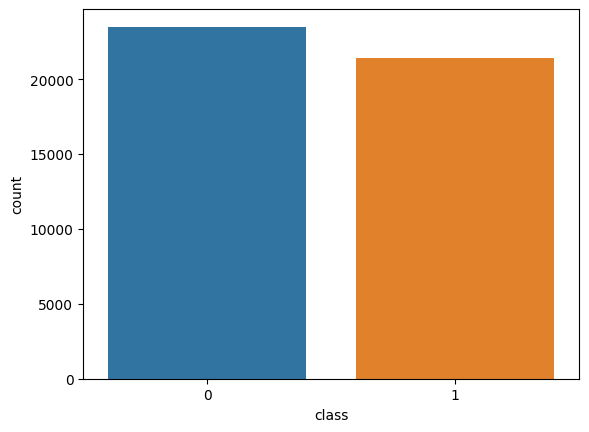

In [11]:
# now we'll explore unique values in each category
sns.countplot(data=data,
              x= "class")
# class with label 0 - > false news
# class with label 1 -> valid news
# By default, Seaborn countplot function will display a histogram-like bar chart where the height of each bar corresponds 
# to the count of observations in each category.               


# Preprocessing and analysis of News Column

In [12]:
# Firstly we will remove all the stopwords, punctuations and any irrelevant spaces from the text. For that NLTK Library is required
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# The function takes in a list of strings (i.e., the textual data) as an argument, and it returns a preprocessed list of strings. The preprocessing steps applied to each sentence in the list are:

# Removing all non-alphanumeric characters (i.e., anything that is not a letter or number) from the sentence using a regular expression pattern that matches anything that is not a word character or whitespace character (re.sub(r'[^\w\s]', '', sentence)).

# Converting all the remaining words in the sentence to lowercase using the lower() method.

# Removing all stopwords from the sentence. Stopwords are common words that do not carry much meaning on their own, such as "the", "and", "a", etc. This is done using the stopwords.words('english') method from the Natural Language Toolkit (nltk) library.

# Joining the remaining words back together into a single string with spaces in between (' '.join(...)).

# The tqdm library is used here to provide a progress bar during the loop iteration over the data list. This is helpful to track the progress of the function when processing large datasets, as it displays a progress bar with an estimate of the remaining processing time.
def preprocess_text(text_data):
    preprocessed_text = []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return preprocessed_text

In [14]:
# To implement the above function to all the news in text column

preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [33:23<00:00, 22.42it/s]


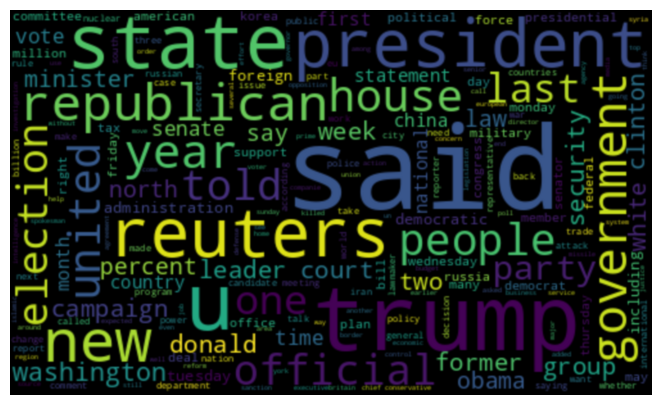

' The random_state parameter in the WordCloud object is used to specify a random seed for generating the Word Cloud. The seed is a starting point for the pseudo-random number generator used by the Word Cloud algorithm to determine the layout and color of the words in the visualization.\n\nBy specifying a random seed, the Word Cloud will generate the same layout and color scheme every time the code is run with the same input text data. This can be useful for reproducibility and consistency in research or analysis.\n\nFor example, if two researchers are analyzing the same text data using a Word Cloud visualization, they can use the same random seed to ensure that their visualizations are comparable and reproducible. If the random seed is not specified, the Word Cloud algorithm will use a different seed every time the code is run, resulting in different visualizations.\n\nIn summary, the random_state parameter controls the randomness of the Word Cloud generation process, and can be used t

In [15]:
# Visualizing worlcloud for real news

# consolidated string is a concatenation of all the text data 
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=500,
                      height=300,
                      random_state=9,
                      max_font_size=90,
                      collocations=False)
plt.figure(figsize=(10, 5))
plt.imshow(wordCloud.generate(consolidated), interpolation='bicubic')
plt.axis('off')
plt.show()

''' The first line creates a consolidated string of all the text data that belongs to class 1. This is done using a list comprehension inside the join() method. The data['text'][data['class'] == 1] expression filters out all the rows from the 'text' column of the 'data' DataFrame that correspond to class 1, and the astype(str) method converts each element in the resulting Series object to a string data type. The join() method then concatenates all the resulting strings with a space character in between.

Next, the WordCloud object is instantiated with several parameters that define the visual appearance and behavior of the Word Cloud. These parameters include the width and height of the image, the random state for generating the Word Cloud, the maximum font size, and a flag to turn off collocation (i.e., the grouping of adjacent words).

The plt.figure() method is called to set the size of the figure that will display the Word Cloud.

The imshow() method of the plt module is used to display the Word Cloud. The generate() method of the WordCloud object is called with the consolidated string of text data as its argument, which generates the Word Cloud based on the frequency of each word in the text. The interpolation parameter sets the interpolation method used to display the image.

The axis() method is called with the argument 'off' to remove the x and y axis ticks from the plot.

Finally, the show() method is called to display the Word Cloud plot. '''


''' The random_state parameter in the WordCloud object is used to specify a random seed for generating the Word Cloud. The seed is a starting point for the pseudo-random number generator used by the Word Cloud algorithm to determine the layout and color of the words in the visualization.

By specifying a random seed, the Word Cloud will generate the same layout and color scheme every time the code is run with the same input text data. This can be useful for reproducibility and consistency in research or analysis.

For example, if two researchers are analyzing the same text data using a Word Cloud visualization, they can use the same random seed to ensure that their visualizations are comparable and reproducible. If the random seed is not specified, the Word Cloud algorithm will use a different seed every time the code is run, resulting in different visualizations.

In summary, the random_state parameter controls the randomness of the Word Cloud generation process, and can be used to produce consistent and reproducible visualizations. '''

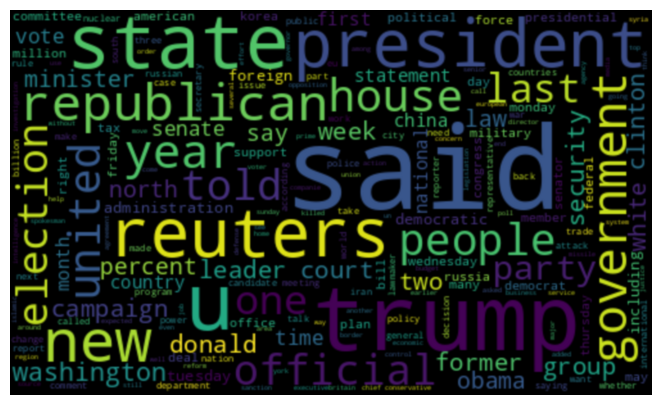

" In simple terms, interpolation is the process of estimating values between two known values. In the context of displaying images, interpolation is used to estimate the color of pixels that are not explicitly present in the original data.\n\nThe interpolation parameter in the imshow() method of the matplotlib library is used to control the method used for interpolating missing pixel values when an image is displayed at a size or resolution different from its original size. There are several interpolation methods available, such as 'nearest', 'bilinear', and 'bicubic', that use different algorithms to estimate the missing pixel values based on neighboring pixels.\n\nBy selecting an appropriate interpolation method, the image can be displayed in a visually pleasing way that appears smooth and continuous, without noticeable gaps or pixelation. In summary, the interpolation parameter controls the method used to estimate missing pixel values in an image when it is displayed at a different 

In [16]:
# Visualizing worlcloud for fake news
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=500,
                      height=300,
                      random_state=9,
                      max_font_size=90,
                      collocations=False)
plt.figure(figsize=(10, 5))
plt.imshow(wordCloud.generate(consolidated), interpolation='bicubic')
plt.axis('off')
plt.show()

''' In simple terms, interpolation is the process of estimating values between two known values. In the context of displaying images, interpolation is used to estimate the color of pixels that are not explicitly present in the original data.

The interpolation parameter in the imshow() method of the matplotlib library is used to control the method used for interpolating missing pixel values when an image is displayed at a size or resolution different from its original size. There are several interpolation methods available, such as 'nearest', 'bilinear', and 'bicubic', that use different algorithms to estimate the missing pixel values based on neighboring pixels.

By selecting an appropriate interpolation method, the image can be displayed in a visually pleasing way that appears smooth and continuous, without noticeable gaps or pixelation. In summary, the interpolation parameter controls the method used to estimate missing pixel values in an image when it is displayed at a different size or resolution. '''

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

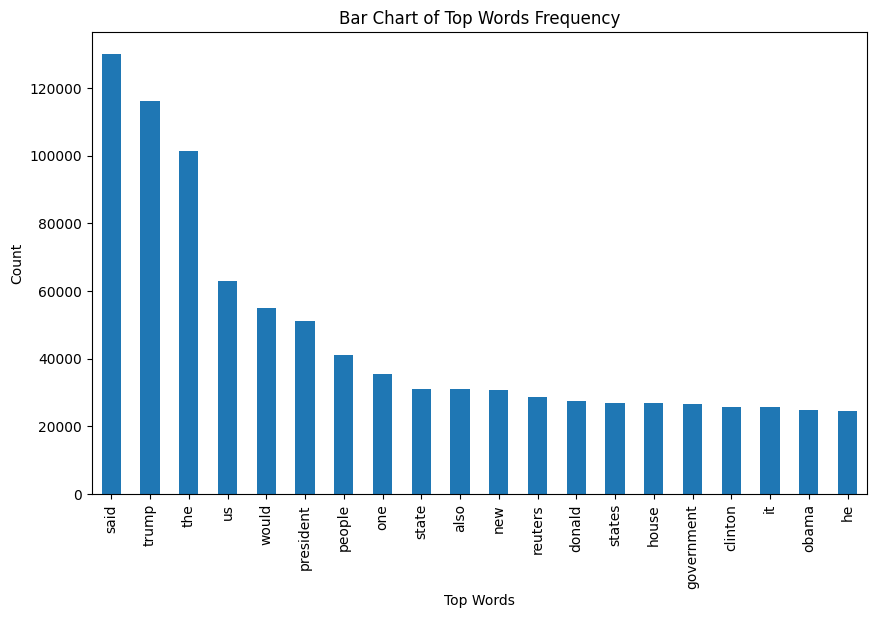

In [17]:
# plot a bargraph of the top 20 most frequent words occuring

from sklearn.feature_extraction.text import CountVectorizer

''' The get_top_n_words function takes a corpus of text and an optional integer argument n, which specifies the number of top words to return. 
If n is not specified, it defaults to None.
The function creates an instance of CountVectorizer and fits it to the corpus of text, which creates a vocabulary of unique words 
and assigns a numerical index to each word in the vocabulary.
The transform method of the CountVectorizer object is used to convert the corpus of text into a bag of words representation, 
where each row corresponds to a document in the corpus and each column corresponds to a unique word in the vocabulary. 
The cells contain the frequency of each word in the corresponding document.
The bag of words representation is summed column-wise to obtain the total frequency of each word across all documents in the corpus.
The resulting frequency counts are paired with their corresponding words using the vec.vocabulary_ attribute of the CountVectorizer object.
The pairs are sorted in descending order by frequency using the sorted() function and returned as a list of tuples containing the word
 and its frequency count.
The common_words variable is assigned the top n words and their frequency counts by calling the get_top_n_words function with the 
text column of the data DataFrame and the number 20 as arguments.
The list of top words and their frequency counts is converted to a DataFrame using pd.DataFrame.
The resulting DataFrame is grouped by word and the counts are summed, and a horizontal bar plot is created using 
the plot() method of the resulting DataFrame. The plot shows the top 20 most frequent words in the corpus and their respective counts. 
The plot has a title, x-label, and y-label to provide additional information to the viewer. ''' 
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

# Converting data into vecotrs

In [18]:
# before converting the text into vectors, we'll split the data into training and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['class'], 
                                                    test_size=0.25)

In [19]:
# Now we'll convert the text into vectors

from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

# Model Training, Evaluation and Prediction

In [20]:
# The dataset is ready to train the model
# for training, we will use logistic regression
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9939149277212146
0.9888691006233303


In [21]:
# Now we will use decision tree classifier

from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.9970614425645592


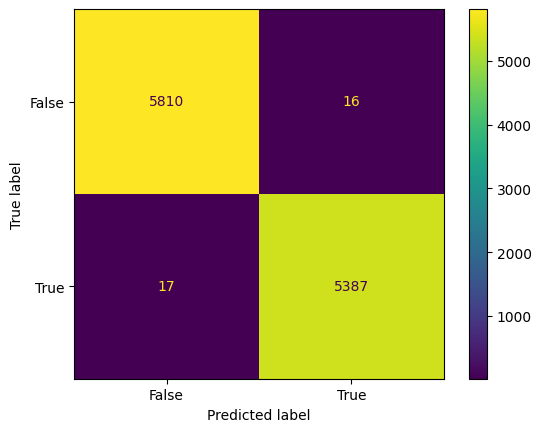

In [22]:
# confusion matrix for decision tree classifier
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()